Dataset loaded. Shape: (3000, 25)
   EmployeeID  Age      Gender    Country            JobRole Department  \
0        1001   50        Male         UK    Sales Associate         HR   
1        1002   36        Male    Germany  Software Engineer         IT   
2        1003   29  Non-binary      India           IT Admin         IT   
3        1004   42        Male  Australia      HR Specialist         IT   
4        1005   40        Male     Brazil   Customer Support    Support   

   YearsAtCompany  WorkHoursPerWeek RemoteWork  BurnoutLevel  ...  \
0              14                47         No          3.37  ...   
1               1                59     Hybrid          7.39  ...   
2              13                59     Hybrid          7.10  ...   
3              15                31        Yes          4.18  ...   
4               6                34        Yes          8.28  ...   

   CommuteTime  HasMentalHealthSupport  ManagerSupportScore  HasTherapyAccess  \
0          117     

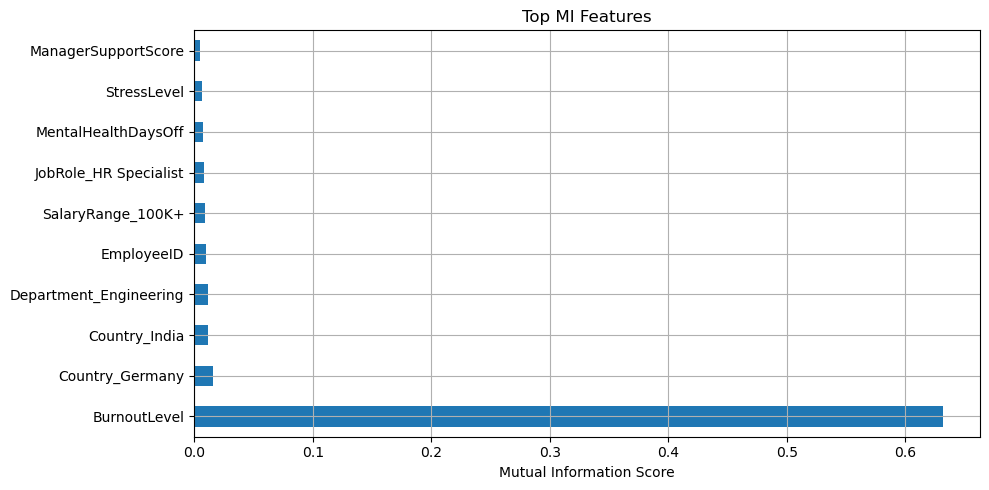

Top 3 features: ['BurnoutLevel', 'Country_Germany', 'Country_India']

 Accuracy with Top 3 Features:
Decision Tree (Top 3): 1.0
Random Forest (Top 3): 1.0
k-NN (Top 3): 0.9966666666666667

 Model Comparison:
        Model  Accuracy (Full Features)  Accuracy (Top 3 Features)
Decision Tree                  1.000000                   1.000000
Random Forest                  1.000000                   1.000000
         k-NN                  0.708333                   0.996667


In [73]:
#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

#2. Load Dataset
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/mental_health_workplace_survey.csv")
print("Dataset loaded. Shape:", df.shape)
print(df.head())

#3. Inspect Column Names
print("Available columns:\n", df.columns.tolist())

#4. Set target column (replace with the correct target in your dataset)
target_column = 'BurnoutRisk'  # Replace with actual column if different

#5. Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

#6. One-hot encode categorical variables
X = pd.get_dummies(X)
print("Total encoded features:", X.shape[1])

#7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#8. Scale features for k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#9. Initialize models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

#10. Train with all features
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)

#11. Predict with all features
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
knn_preds = knn.predict(X_test_scaled)

#12. Evaluate all models (baseline)
print("\n Accuracy with All Features:")
print("Decision Tree:", accuracy_score(y_test, dt_preds))
print("Random Forest:", accuracy_score(y_test, rf_preds))
print("k-NN:", accuracy_score(y_test, knn_preds))

#13. Feature Selection using Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importances
mi_series.head(10).plot(kind="barh", title="Top MI Features", figsize=(10,5))
plt.xlabel("Mutual Information Score")
plt.grid(True)
plt.tight_layout()
plt.show()

#14. Select Top 3 features
top3 = mi_series.head(3).index
print("Top 3 features:", top3.tolist())

#15. Retrain with Top 3 Features
X_top3 = X[top3]
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_top3, y, test_size=0.2, stratify=y, random_state=42
)

#Scale for k-NN
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

# Train again with top 3
dt.fit(X_train3, y_train3)
rf.fit(X_train3, y_train3)
knn.fit(X_train3_scaled, y_train3)

# Predict
dt_preds_top3 = dt.predict(X_test3)
rf_preds_top3 = rf.predict(X_test3)
knn_preds_top3 = knn.predict(X_test3_scaled)

#16. Evaluation with top 3
print("\n Accuracy with Top 3 Features:")
print("Decision Tree (Top 3):", accuracy_score(y_test3, dt_preds_top3))
print("Random Forest (Top 3):", accuracy_score(y_test3, rf_preds_top3))
print("k-NN (Top 3):", accuracy_score(y_test3, knn_preds_top3))

#17. Summary Table
summary = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'k-NN'],
    'Accuracy (Full Features)': [
        accuracy_score(y_test, dt_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, knn_preds)
    ],
    'Accuracy (Top 3 Features)': [
        accuracy_score(y_test3, dt_preds_top3),
        accuracy_score(y_test3, rf_preds_top3),
        accuracy_score(y_test3, knn_preds_top3)
    ]
})

print("\n Model Comparison:")
print(summary.to_string(index=False))